<a href="https://colab.research.google.com/github/Nasrin-Akhtar/IITM_MLT-Machine_Learning_Technique/blob/main/KNN_and_Decision_Tree_Week_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week-7

Decision trees and KNN

In [50]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams['font.size'] = 15

## Decision Trees

**Decision stumps**

A decision stump is a decision tree that has a single question at the root node which splits into two leaf nodes. A decision stump partitions the dataset based on a single question: $f_k < \theta$. This is therefore the simplest decision tree that we can come up with.

---
Use the following decision stump for problems 1 and 3: The root has $1000$ data-points out of which $200$ belong to class-1. The left child-node has $100$ data-points out of which $50$ belong to class-1.

### Problem-1

Write a function `entropy` that accepts the proportion of points that belong to class-1 in a node as argument and returns the entropy. Use $\log_2$ for all computations.

Use this function to compute the entropy of the parent node.

In [51]:
node=200/1000
def entropy(p):
  return -((p*np.log2(p))+(1-p)*np.log2(1-p))
entropy(node)

  ### Solution ###

0.7219280948873623

### Problem-2

Plot the entropy of a node as a function of $p$, the proportion of data-points that belong to class $+1$.

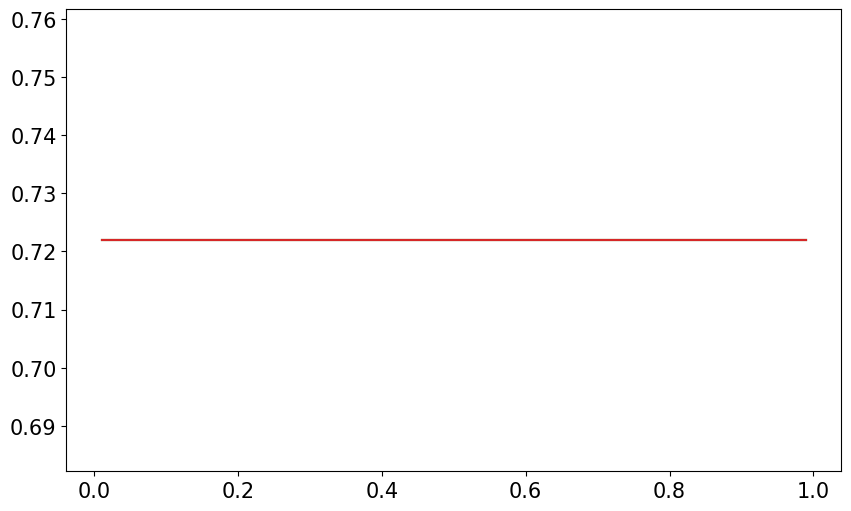

In [52]:
p_values = np.linspace(0.01, 0.99, 100)
total_points_nodes = [ 100, 200, 500, 1000]
class1_points_nodes = [int(p * total) for p in [0.2, 0.3, 0.5, 0.8] for total in total_points_nodes]
plt.figure(figsize=(10, 6))
for total, class1 in zip(total_points_nodes, class1_points_nodes):
    entropy_values = [entropy(class1/total) for p in p_values]
    plt.plot(p_values, entropy_values, label=f'Node ({class1}/{total})')
### Solution ###

### Problem-3

Write a function `IG` that accepts the following arguments:

- `E`: entropy of the parent node `Q`
- `El`: entropy of the left child `L`
- `Er`: entropy of the right child `R`
- `gamma`: proportion of data-points in left child

Use this function to compute the information gain for the parent node.

In [53]:
l1=50/100
r1=150/900
gamma=100/1000
def IG(node,gamma,l1,r1):
  return entropy(node)-(gamma*entropy(l1)+(1-gamma)*entropy(r1))
IG(node,gamma,l1,r1)### Solution ###

0.03690791540384364

### Problem-4

Consider a decision stump with $1000$ data-points. Call the root node $Q$ and the left and right leaf nodes $L$ and $R$.

- The proportion of data-points that belong to class $+1$ in $Q$ is equal to $0.4$
- The proportion of points in the left node is equal to $0.7$, that is, $\gamma = 0.7$
-  $q$ is the proportion of data-points that belong to class $+1$ in $L$

What are the minimum ($q_{\min}$) and maximum ($q_{\max}$) values of $q$?

In [54]:
Q=0.4
class1=0.4*1000#total no. of datapoints of class +1
gamma=0.7
L=0.7*1000 #No. of datapoints in left node
R=1000-L #No. of datapoints in right node
q_min=(class1-R)/L
q_max= class1/L
print(q_min,q_max,'is the range of q')### Solution ###

0.14285714285714285 0.5714285714285714 is the range of q


### Problem-5

Using the above information, plot the information gain of the root as a function of $q$, where $q \in [q_{\min}, q_{\max}]$. Record at least two interesting observations.

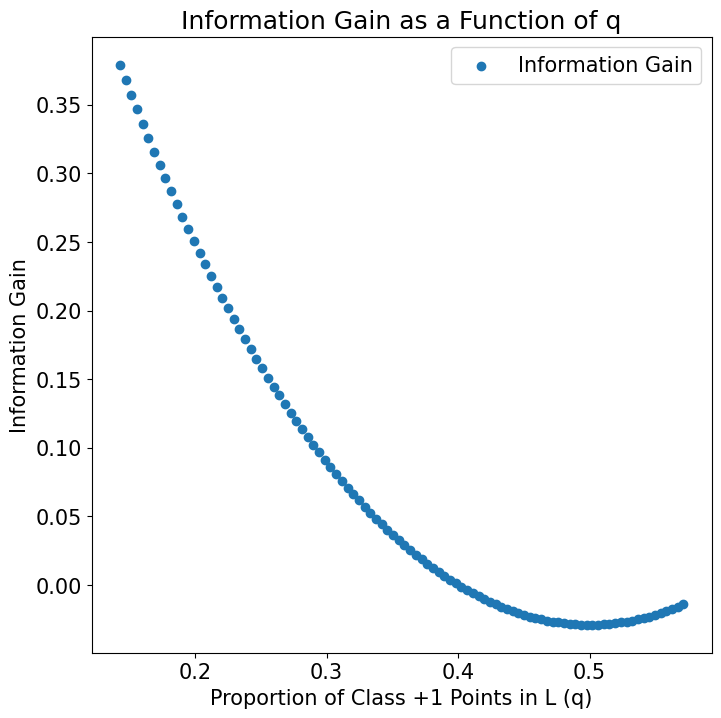

In [55]:
q_values = np.linspace(q_min, q_max, 100)
IG_values = [IG(Q, gamma, q,1-q) for q in q_values]
plt.scatter(q_values, IG_values, label='Information Gain')
plt.title('Information Gain as a Function of q')
plt.xlabel('Proportion of Class +1 Points in L (q)')
plt.ylabel('Information Gain')
plt.legend()
plt.show()
### Solution ###

### Problem-6

We will work with the dataset `X` for the next five problems. Visualize the data using a scatter plot. Color the points that belong to class $+1$ using "green" and those that belong to class $0$ using "red".

In [56]:
### Data ###
### DO NOT CHANGE THE CONTENTS OF THIS CELL ###
rng = np.random.default_rng(seed = 1001)
n_per = 50
cov = np.eye(2) / 10
X1 = rng.multivariate_normal([1, 1], cov, n_per)
y1 = np.ones(n_per)
X2 = rng.multivariate_normal([5, 3], cov , n_per)
y2 = np.zeros(n_per)
X3 = rng.multivariate_normal([3, 4], cov, n_per)
y3 = np.ones(n_per)
X4 = rng.multivariate_normal([3, 2], cov, n_per)
y4 = np.zeros(n_per)
X = np.concatenate((X1, X2, X3, X4), axis = 0)
y = np.int64(np.concatenate((y1, y2, y3, y4)))
### DO NOT CHANGE THE CONTENTS OF THIS CELL ###

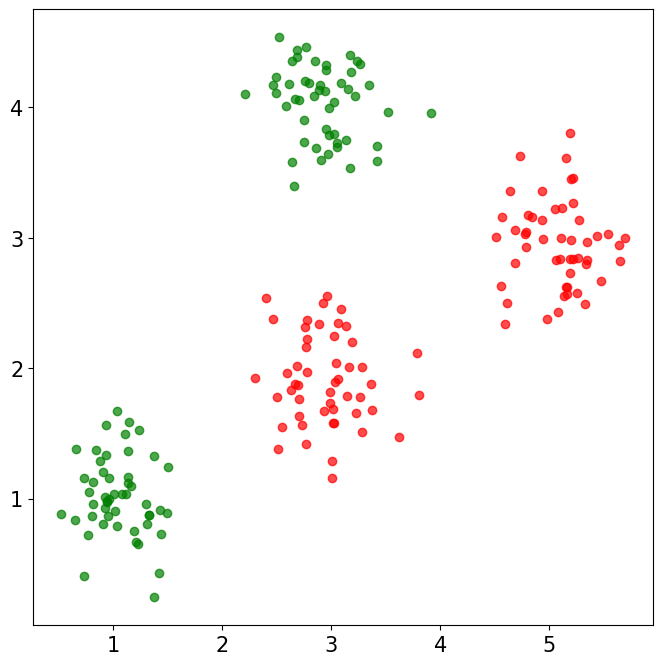

In [57]:
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='green', label='Class +1', alpha=0.7)
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0', alpha=0.7)### Solution ###

### Problem-7

If you were to use a decision stump as a classifier:

- What is the best question $f_k < \theta$?
    - enter the feature index, $k$ (use zero-indexing)
    - enter the value of $\theta$
- What is the information gain for this question?

---

Write the function named `best_split` to solve this problem:

The function should accept the feature matrix `X` and the label vector `y` as arguements. It should return the tuple `(feat_best, value_best, ig_best)`.

In [58]:
def best_split(X,y):
  n_features = X.shape[1]
  m = X.shape[0]
  best_information_gain = 0
  best_feature = None
  best_value = None

  for feature in range(n_features):
      unique_values = np.unique(X[:, feature])

      for value in unique_values:
            # Split the data based on the current feature and value
          left_indices = X[:, feature] < value
          right_indices = ~left_indices

            # Calculate proportions of class +1 in parent, left, and right
          p_parent = np.sum(y) / m
          gamma=np.sum(left_indices) / m
          p_left = np.sum(y[left_indices]) / np.sum(left_indices)
          p_right = np.sum(y[right_indices]) / np.sum(right_indices)

            # Calculate information gain for the current split
          current_information_gain = IG(p_parent,gamma,p_left, p_right)

            # Update the best split if the current information gain is higher
          if current_information_gain > best_information_gain:
              best_information_gain = current_information_gain
              best_feature = feature
              best_value = value

  return best_feature, best_value, best_information_gain
best_split(X,y)
# Example usage:
  ### Solution ###

(0, 3.6214925864798597, 0.3023672739763503)

### Problem-8

Grow a decision tree for this problem. You may have to use two programming concepts:

- recursion
- binary trees

Once you have grown the tree, answer the following questions:

- How many internal nodes does your tree have?
- How many leaf nodes does it have?

In [59]:
### Solution ###

### Problem-9

Predict the label of the point $(3, 4)$.

In [60]:
### Solution ###

### Problem-10

Plot the decision boundary.

In [61]:
### Solution ###

## KNN


In [62]:
### Data ###
### DO NOT EDIT THIS CELL ###
rng = np.random.default_rng(seed = 1001)
X = rng.uniform(-10, 10, (100, 2))
y = np.int32(np.zeros(X.shape[0]))
y[X[:, 1] > X[:, 0]] = 1
X = np.concatenate((X,
                   rng.multivariate_normal([-5, 5], np.eye(2), 10)),
                   axis = 0)
y = np.concatenate((y, np.int32(np.zeros(10))))
### DO NOT EDIT THIS CELL ###

### Problem-11

Visualize the data using a scatter plot. Use red for class $0$ and green for class $1$.

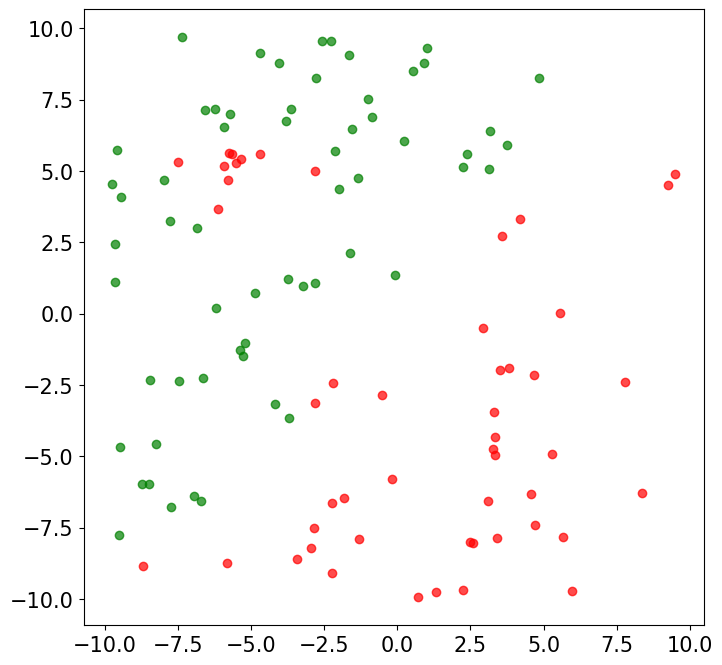

In [63]:
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='green', label='Class +1', alpha=0.7)
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0', alpha=0.7)### Solution ###

### Problem-12

Write a function `predict` that accepts the following arguments:

- `X` - feature matrix
- `y` - label vector
- `x_test` - test data-point
- `k` - number of neighbors

The function should return the prediction for the point `x_test`. Use this function to compute the predicted label for the point $(-3, -2)$ with $k = 10$.

In [64]:
x_test=[[-3,-2]]
def predict(X,y,x_test,k):
  dist= np.linalg.norm(X-x_test,axis=1)
  indices= np.argsort(dist)[:k]
  neighbour_labels=y[indices]
  pred= np.bincount(neighbour_labels).argmax()
  if pred==1:
    return 'green'
  else:
    return 'red'

predict(X,y,x_test,10)


'green'

### Problem-13

Plot the decision boundary for different values of $k$:

- $k = 1$
- $k = 3$
- $k = 7$
- $k = 15$
- $k = 31$
- $k = 63$

Record at least two observations.